In [46]:
from numpy import genfromtxt
import matplotlib.pyplot as mpl
import numpy as np
import math

data_file = 'mean_annual.csv'

data = genfromtxt(data_file, delimiter=';')

In [47]:
print(data)

[[  1.70050000e+03   8.30000000e+00  -1.00000000e+00  -1.00000000e+00
    1.00000000e+00]
 [  1.70150000e+03   1.83000000e+01  -1.00000000e+00  -1.00000000e+00
    1.00000000e+00]
 [  1.70250000e+03   2.67000000e+01  -1.00000000e+00  -1.00000000e+00
    1.00000000e+00]
 ..., 
 [  2.01450000e+03   1.13300000e+02   8.00000000e+00   5.27300000e+03
    1.00000000e+00]
 [  2.01550000e+03   6.98000000e+01   6.40000000e+00   8.90300000e+03
    1.00000000e+00]
 [  2.01650000e+03   3.99000000e+01   3.90000000e+00   9.72400000e+03
    0.00000000e+00]]


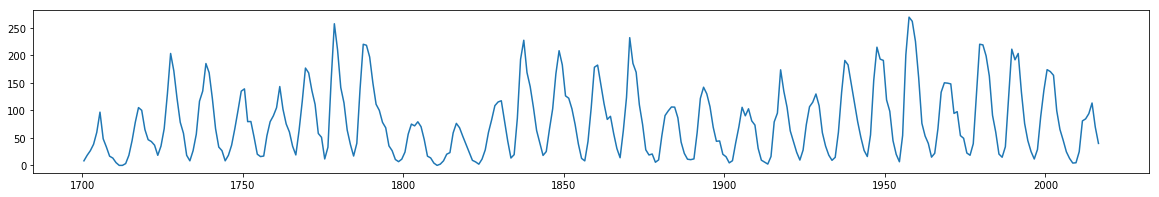

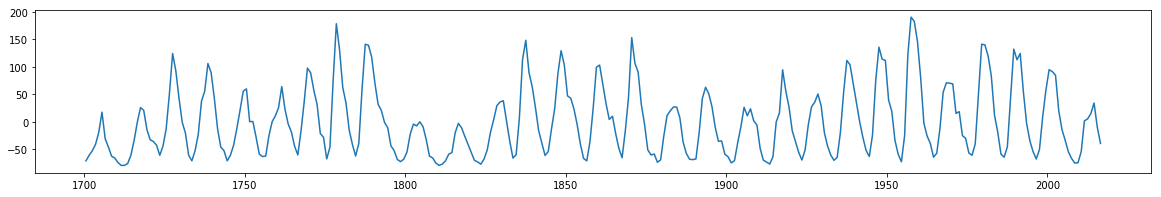

In [48]:
mpl.figure(figsize=(20,3))
mpl.clf()
mpl.plot(data[:,0],data[:,1])
mpl.show()

#compute mean
mean = 0
for x in data[:,1]:
    mean+=x
mean/=len(data[:,1])

#remove constant offset
for i in range(len(data[:,1])):
    data[i,1]-=mean

#plot modified function
mpl.figure(figsize=(20,3))
mpl.clf()
mpl.plot(data[:,0],data[:,1])
mpl.show()


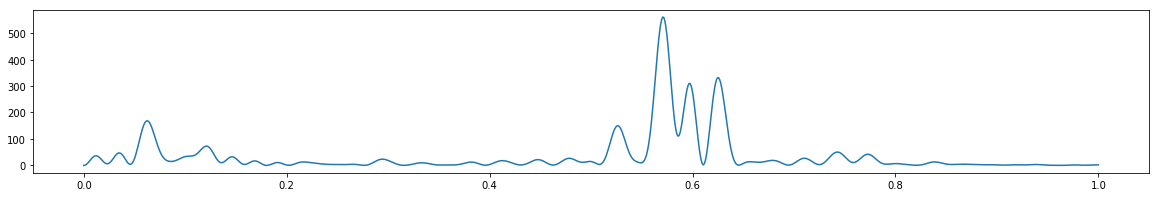

In [51]:
def schuster_sum(w,t,x,trigfunc):
    #assert t and x are equal length
    if len(t) != len(x):
        print("t and x must be equal length")
    c = 0
    for k in range(0,len(t)):
        c += x[k]*trigfunc(w*t[k])
    return c

def schuster(w,t,x):
    sin_sum = schuster_sum(w, t,x, math.sin)
    cos_sum = schuster_sum(w, t,x, math.cos)
    return (sin_sum**2 + cos_sum**2)/len(data[:,0])**2

#compute the schuster over a range of angular frequencies
sch = []
freq = np.linspace(0,1,1000)
for i in range(0,len(freq)):
    sch.append(schuster(freq[i],data[:,0],data[:,1]))

#plot schuster as a function of angular frequency
mpl.figure(figsize=(20,3))
mpl.clf()
mpl.plot(freq,sch)
mpl.show()